In [4]:
!pip install wbdata
wb_pop_0014 = 'SP.POP.0014.TO.ZS'
wb_pop_1564 = 'SP.POP.1564.TO.ZS'
wb_pop_65up = 'SP.POP.65UP.TO.ZS'

wb_rural_total = 'SP.RUR.TOTL.ZS'
wb_urban_total = 'SP.URB.TOTL.IN.ZS'

wb_mobile_penetration = 'IT.CEL.SETS.P2'


import wbdata
import pandas as pd  
from datetime import datetime




count    59.000000
mean     76.267610
std       3.529626
min      69.996000
25%      73.648000
50%      75.089000
75%      79.670000
max      82.256000
dtype: float64
count    697.000000
mean      76.257288
std        3.408639
min       69.996000
25%       73.333000
50%       75.891689
75%       79.169061
max       82.727187
dtype: float64


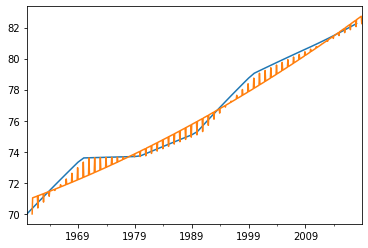

In [7]:
datasetname = 'SP.RUR.TOTL.ZS'
datasetname = 'SP.URB.TOTL.IN.ZS'

countries = wbdata.get_country(display=False)
countries
countries[0]['name']
data = wbdata.get_data(datasetname, country='US')
#print(data)

dict([(int(d['date']), float(d['value'])) for d in data if d['value'] is not None])
infl = dict([(int(d['date']), float(d['value'])) for d in data if d['value'] is not None])

dt = [datetime(y,12,31) for y in infl.keys()]  
ts = pd.Series(list(infl.values()), dt)

ts.plot()
print(ts.describe())


ts = ts.resample('M').interpolate(method='spline',order=2)
ts.plot()
print(ts.describe())

In [70]:
datasetname = 'SP.RUR.TOTL.ZS'
datasetname = 'SP.URB.TOTL.IN.ZS'

df = wbdata.get_dataframe({datasetname:'value'}, country=['USA','CN','IE'])
df = df.unstack(level=0)
print(df.head())
df = df.melt('date', var_name='cols',  value_name='vals')

print(df)
g = sns.factorplot(x="", y="vals", hue='cols', data=df)

value                      
country   China Ireland United States
date                                 
1960     16.203  45.184        69.996
1961     16.708  45.393        70.377
1962     17.226  45.603        70.757
1963     17.757  45.813        71.134
1964     18.299  46.023        71.508


KeyError: 'date'

In [1]:
df = wbdata.get_dataframe({datasetname:'value'}, country=['USA','CN','IE'])
print(df.info())
df.unstack(level=0)

NameError: name 'wbdata' is not defined

In [29]:
import matplotlib.pyplot as py
import seaborn as sbs

sbs.set()

df.plot(x ='Unemployment_Rate', y='Stock_Index_Price', kind = 'scatter')
plt.show()

df.plot()


KeyError: 'Unemployment_Rate'